In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [238]:
df = pd.read_csv('https://basketradarstorage.blob.core.windows.net/cleandata/nov2k_clean_with_zones.csv')

In [239]:
df_date = df.assign(date = pd.to_datetime(df.date))
df_nov2k = df_date[df_date.date.dt.year == 2000]
df_nov2k.head()

,Unnamed: 0.1,Unnamed: 0,match_id,shotX,shotY,quarter,time_remaining,player,team,made,shot_type,distance,score,opp,status,date,zone
0,0,0,200011010BOS,35.3,20.0,1st quarter,11:30.0,Jerry Stackhouse,DET,False,2-pointer,19,0-2,'DET',trails,2000-11-01,7
1,1,1,200011010BOS,13.1,17.7,1st quarter,11:13.0,Chucky Atkins,DET,False,2-pointer,17,0-2,'DET',trails,2000-11-01,6
2,2,2,200011010BOS,33.8,20.0,1st quarter,10:28.0,Billy Owens,DET,False,2-pointer,18,0-4,'DET',trails,2000-11-01,7
3,3,3,200011010BOS,21.7,8.0,1st quarter,10:22.0,Billy Owens,DET,False,2-pointer,4,0-4,'DET',trails,2000-11-01,15
4,4,4,200011010BOS,0.7,5.7,1st quarter,10:17.0,Jerry Stackhouse,DET,False,3-pointer,23,0-4,'DET',trails,2000-11-01,1


In [240]:
df_nov2k.describe()

,Unnamed: 0.1,Unnamed: 0,shotX,shotY,distance,date,zone
count,33173.000000,33173.000000,33173.000000,33173.000000,33173.000000,33173,33173.000000
mean,16586.000000,16586.000000,23.845902,11.481274,11.712266,2000-11-15 10:04:48.885539456,10.000844
min,0.000000,0.000000,-0.800000,0.200000,0.000000,2000-11-01 00:00:00,1.000000
25%,8293.000000,8293.000000,16.900000,5.000000,2.000000,2000-11-08 00:00:00,6.000000
50%,16586.000000,16586.000000,24.000000,8.000000,12.000000,2000-11-15 00:00:00,12.000000
75%,24879.000000,24879.000000,30.200000,17.200000,19.000000,2000-11-24 00:00:00,15.000000
max,33172.000000,33172.000000,49.000000,44.400000,39.000000,2000-11-30 00:00:00,15.000000
std,9576.364576,9576.364576,10.893548,7.769547,9.176680,NaN,5.025043


In [241]:
# cmap = plt.colormaps.get_cmap('tab20')
# norm = mpl.colors.BoundaryNorm(np.linspace(0.5, 16.5, 17), cmap.N)

# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(df_nov2k['shotX'], df_nov2k['shotY'], c=df['zone'], cmap=cmap, norm=norm)
# plt.colorbar(scatter, label='Zone', ticks=np.linspace(1, 16, 16), drawedges=False)
# plt.title('NBA Shots with Zone Coloring')
# plt.xlabel('Shot X')
# plt.ylabel('Shot Y')
# plt.show()

## Assigning Profile Qualities

In [242]:
df_nov2k_copy = df_nov2k.copy()

dist_bottom1pct = df['distance'].quantile(0.01)
dist_top1pct = df['distance'].quantile(0.95)

# df[(df['distance'] > dist_bottom1pct) & (df['distance'] < dist_top1pct)].describe(percentiles=[0.33, 0.67])

df_nov2k.describe(percentiles=[0.33, 0.67])

,Unnamed: 0.1,Unnamed: 0,shotX,shotY,distance,date,zone
count,33173.000000,33173.000000,33173.000000,33173.000000,33173.000000,33173,33173.000000
mean,16586.000000,16586.000000,23.845902,11.481274,11.712266,2000-11-15 10:04:48.885539456,10.000844
min,0.000000,0.000000,-0.800000,0.200000,0.000000,2000-11-01 00:00:00,1.000000
33%,10946.760000,10946.760000,22.200000,5.400000,5.000000,2000-11-10 00:00:00,7.000000
50%,16586.000000,16586.000000,24.000000,8.000000,12.000000,2000-11-15 00:00:00,12.000000
67%,22225.240000,22225.240000,25.600000,13.200000,17.000000,2000-11-21 00:00:00,15.000000
max,33172.000000,33172.000000,49.000000,44.400000,39.000000,2000-11-30 00:00:00,15.000000
std,9576.364576,9576.364576,10.893548,7.769547,9.176680,NaN,5.025043


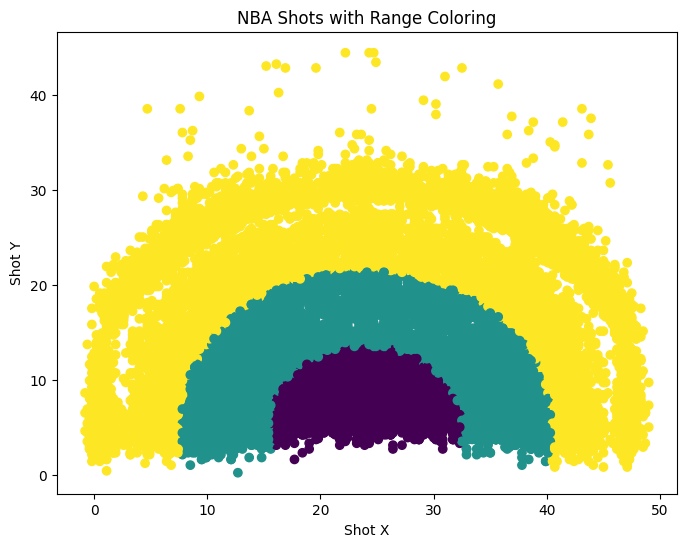

In [243]:
df_nov2k['range'] = df_nov2k['distance'].apply(lambda d: 3 if d > 16 else 2 if d > 8 else 1)
plt.figure(figsize=(8, 6))
scatter2 = plt.scatter(df_nov2k['shotX'], df_nov2k['shotY'], c=df_nov2k['range'])
plt.title('NBA Shots with Range Coloring')
plt.xlabel('Shot X')
plt.ylabel('Shot Y')
plt.show()

In [244]:
df_nov2k['quarter_int'] = df_nov2k['quarter'].apply(lambda q: int(q[0]))
df_nov2k['half'] = df_nov2k['quarter_int'].apply(lambda q: 1 if q < 3 else 2)
profiles_nov2k = df_nov2k.groupby(['player'])\
    .agg(
        avg_distance = ('distance', 'mean'),
        med_distance = ('distance', 'median'),
        avg_x = ('shotX', 'mean'),
        med_x = ('shotX', 'median'),
        make_pct = ('made', lambda x: np.mean(x*1)),
        mode_half = ('half', lambda x: x.mode()),
    ).reset_index()
profiles_nov2k.head()

,player,avg_distance,med_distance,avg_x,med_x,make_pct,mode_half
0,A.C. Green,11.000000,13.0,27.755882,27.45,0.205882,1
1,A.J. Guyton,18.500000,20.0,23.448649,24.40,0.364865,2
2,Aaron McKie,14.283784,16.5,23.148649,24.00,0.445946,1
3,Aaron Williams,6.257143,5.0,23.960952,24.00,0.419048,2
4,Adam Keefe,6.916667,5.0,24.237500,24.00,0.541667,1


In [245]:
# Ranges based on trimmed 33 and 67% quantiles
profiles_nov2k['profile_d'] = profiles_nov2k['avg_distance'].apply(lambda d: 'L' if d > 16 else 'M' if d > 8 else 'S')
profiles_nov2k['profile_d'].value_counts()


profile_d
M    220
S     99
L     60
Name: count, dtype: int64

In [246]:
# Average x within 1 foot of middle = netural
profiles_nov2k['profile_p'] = profiles_nov2k['avg_x'].apply(lambda x: 'L' if x > 26 else 'N' if x > 24 else 'R')
profiles_nov2k['profile_p'].value_counts()

profile_p
R    214
N    105
L     60
Name: count, dtype: int64

In [249]:
profiles_nov2k[["player", "profile_d", "profile_p"]].head()

,player,profile_d,profile_p
0,A.C. Green,M,L
1,A.J. Guyton,L,R
2,Aaron McKie,M,R
3,Aaron Williams,S,R
4,Adam Keefe,S,N


In [248]:
# df_nov2k['profile_d'] = df_nov2k.apply(lambda row: 'S' if row['zone'] > 10 else 'M' if row['zone'] > 5 else 'L', axis=1)

# def map_zone_to_profile(row): 
#     if row['zone'] > 10: 
#         d = 'S'
#     elif row['zone'] > 5: 
#         d = 'M'
#     else:
#         d = 'L'
    
#     if row['x'] > 35:
#         s = 'L'
#     elif row['x'] > 14:
#         s = 'M'

#     return d, 0

# # def map_zone_to_profile_side(zone):

# df_profile = pd.DataFrame({ 'player': df_nov2k['player'] })
# df_profile[['profile_d', 'profile_s']] = df_nov2k.apply(map_zone_to_profile, axis=1, result_type='expand')
# df_profile.head()